# **OLC '22: Heart Disease Analysis (Data Viz, EDA, and ML Model)**
Written by: [Andreas Notokusumo](https://www.linkedin.com/in/andreasnk/) (18/7/2022) \
Source Data: [Heart Disease Datasets](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

---

### **About dataset**
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

<br>

### **About the project**
This project is developed as part of my OLC 2022's final project in Data Science. This project featured five main steps toward the dataset as described throughout this notebook, including:
1. Project Setup and Dataset's Context
2. EDA *(Exploratory Data Analysis)*
3. Data Preprocessing
4. ML Modelling
5. ML Model Evaluation
<br>

The main goal of this project is to create a *ML Model* that could predict if a patient suffered a heart disease (indicated by `1`) or not (`0`). The ML Model is previously trained from a processed data from the original and raw dataset

### **Step 1: Project Setup and Dataset's Context**
#### 1. Imports

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Pastel Palette 
pastel = sns.color_palette('pastel')

In [2]:
# Reading datasets
heartData = pd.read_csv('./heart.csv')

#### 2. Dataset's Context

In [3]:
# Printing head and tail
print(heartData.head())
print(heartData.tail())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0

##### Dataset's Column
1. `age`
2. `sex` 
3. `cp` is chest pain type (4 values) 
4. `trstbps`: resting blood pressure 
5. `chol` isserum cholestoral in mg/dl
6. `fbs` is fsting blood sugar > 120 mg/dl
7. `restecg` resting electrocardiographic results (values 0,1,2)
8. `thalach` is maximum heart rate achieved
9. `exang` is exercise induced angina
10. `oldpeak` = ST depression induced by exercise relative to rest
11. the `slope` of the peak exercise ST segment
12. `ca` is number of major vessels (0-3) colored by flourosopy
13. `thal` is The names and social security numbers of the patients were recently removed from the database, replaced with dummy values
    - 0 = normal
    - 1 = fixed defect
    - 2 = reversable defect 
14. `target` is the result of whether the patient has heart disease (`1`) or not (`0`)

In [4]:
# Columns info
print(heartData.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


##### Dataset's Info

In [5]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


As seen on the output above, the dataset got no missing values (null). Additionally, it consists of 1024 rows and 14 columns

---

### **Step 2: Exploratory Data Analysis**
In this step, we will analyze *almost all* columns from the dataset to eventually find the **correlations** from each column towards the `target` column, which is whether the patient is diseased or not. Throughout the analysis, we will compare each column's values against the `target` column to observe how they are affecting the `target` column.

#### 1. Heart Disease Target Column

In [6]:
# Column: `target`'s values
print(heartData.target.value_counts())

1    526
0    499
Name: target, dtype: int64


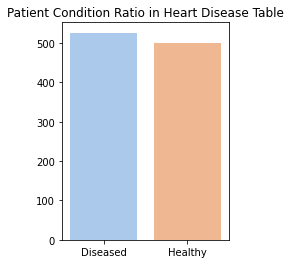

In [7]:
# Target column values in barplot
plt.figure(figsize=(3, 4))
barplot = sns.barplot(
  x = ["Diseased", "Healthy"],
  y = heartData.target.value_counts().values,
  palette = pastel
)

plt.title("Patient Condition Ratio in Heart Disease Table")
plt.show()

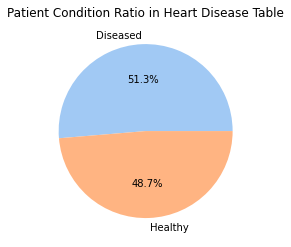

In [8]:
# Target column values in piechart
plt.pie(
  heartData.target.value_counts().values,
  labels = ["Diseased", "Healthy"],
  colors = pastel,
  autopct='%1.1f%%',
)

plt.title("Patient Condition Ratio in Heart Disease Table")
plt.show()

From the visualisations above, we can say that roughly half of the people from the dataset got a heart disease

#### 2. Age and Sex Factors

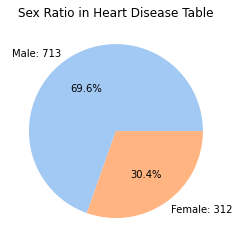

In [9]:
# Sex column in pie chart
plt.pie(
  heartData.sex.value_counts().values,
  labels = [
    "Male: {}".format(heartData.sex.value_counts()[1]),
    "Female: {}".format(heartData.sex.value_counts()[0])],
  colors = pastel,
  autopct= '%1.1f%%', #decimals
)
plt.title("Sex Ratio in Heart Disease Table")

plt.show()

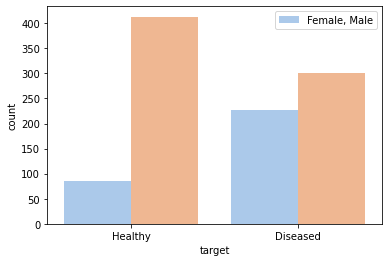

In [10]:
# Sex and target's condition in countplot
countplot = sns.countplot(
  data = heartData,
  x = 'target', #column target,
  hue = 'sex', #2nd column (sex),
  palette = pastel
)

countplot.set_xticklabels(['Healthy', 'Diseased'])
plt.legend(['Female, Male'])
plt.show()

According to the countplot above, **female patients** *tends* to have heart disease, despite their populations are lower than the male. This can be observed from the **diseased female** (right side)'s higher growth from their healthy populations. On the other side, the population growth of **healthy male** (left side) is negative towards the **diseased male**

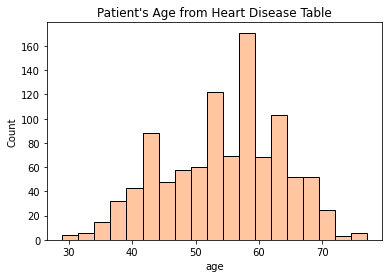

In [11]:
# Age column in histplot
sns.histplot(heartData.age, color=pastel[1])

plt.title("Patient's Age from Heart Disease Table")
plt.show()

From two columns above, we can conclude that:
1. **Most patient are male** (almost 70%)
2. Most patients **start to show heart disease** symptoms from around **age 40**
3. Most patients got heart disease on **age 60**
4. **Female patient** *tends* to have heart disease than the **male**

#### 3. Chest Pain Types

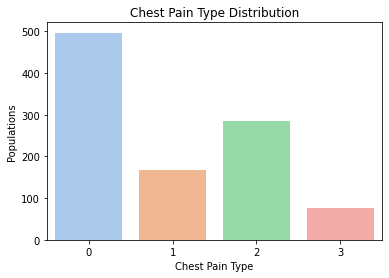

In [12]:
# Chest Pain Type Populations
sns.barplot(
  data = heartData,
  x = heartData['cp'].value_counts().index,
  y = heartData['cp'].value_counts().values,
  palette = 'pastel'
)

plt.xlabel("Chest Pain Type")
plt.ylabel("Populations")
plt.title("Chest Pain Type Distribution")
plt.show()

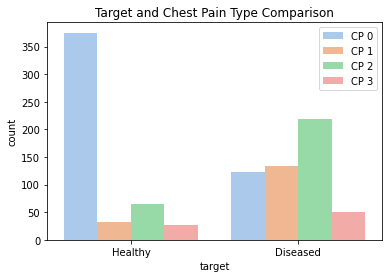

In [13]:
# Target and Chest Pain Comparison
countplot = sns.countplot(
  data = heartData,
  x = 'target',
  hue = 'cp',
  palette = pastel
)

countplot.set_xticklabels(['Healthy', 'Diseased'])

plt.legend(['CP 0', 'CP 1', 'CP 2', 'CP 3'])
plt.title("Target and Chest Pain Type Comparison")
plt.show()

From the table, it can be found that many **healthy people** got some sort of chest pain. From here, we can observe the effect from each chest type toward whether the patient is diseased or not. As visualized above, the writer combined `target` column with `cp` column to identify:
> Which chest pain type that reported most from the **diseased people**?

From the countplot above, we can see that `CP 2` or *Chest Pain Type 2* (colored green) is the most reported chest pain type from the **diseased people**. This conclusion indicates that `cp` column or Chest Pain Type is indeed affecting the `target` column

#### 4. Resting Electrocardiographic Results (`restecg`)
- Based on the dataset's official context, `restecg` column can be defined as:
  1. `0` -> normal
  2. `1` -> patient got ST-T wave abnormality
  3. `2` -> patient got definite abnormality
- In the code below, we will test the `restecg` column's values against `target` to see how they affect it:

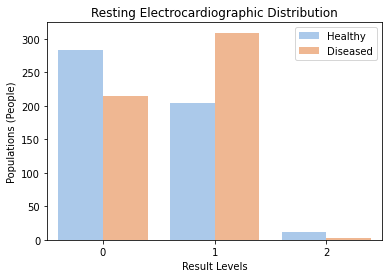

In [21]:
sns.countplot(
  data = heartData,
  x = "restecg",
  hue = "target",
  palette = pastel
)

plt.xlabel("Result Levels")
plt.ylabel("Populations (People)")
plt.title("Resting Electrocardiographic Distribution")

plt.legend(["Healthy", "Diseased"])

From the countplot above, we can see that `restceg 2` is very rare in both healty and diseased people. While `Type 1` is found on many **diseased people**, indicating its dangers and perhaps its effect towards the `target` column

#### 5. Maximum Heart Rate (`thalach`)
- This data is pretty self-explanatory, and in the code below, we will compare this table towards `target` column:

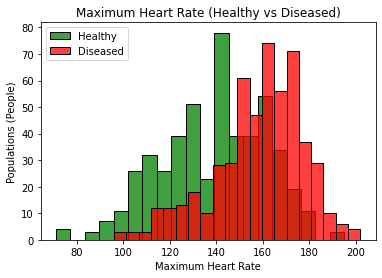

In [47]:
#Histogram for healthy people's heartrate
sns.histplot(
  heartData.where(heartData['target'] == 0)['thalach'],
  bins = 20,
  color = 'green' 
)

plt.xlabel("Maximum Heart Rate")
plt.ylabel("Populations (People)")

#Histogram for diseased people's heartrate
sns.histplot(
  heartData.where(heartData['target'] == 1)['thalach'],
  bins = 20,
  color = 'red'
)

plt.xlabel("Maximum Heart Rate")
plt.ylabel("Populations (People)")
plt.legend(["Healthy", "Diseased"])
plt.title("Maximum Heart Rate (Healthy vs Diseased)")

#Show both histplots in one graph
plt.show()

From two combined plots above, we can see that **diseased people** (red)'s maximum heart rate is significantly higher than healthy people. \With little to no surprise, heart rate or `thalach` column does seemingly will affect `target` column. 

#### 6. Exercised Induced Angina (`exang`)
- `exang` is simply represented by value `0` (No) and `1` (Yes)
- Below, is the usual comparison between this column against the `target column`

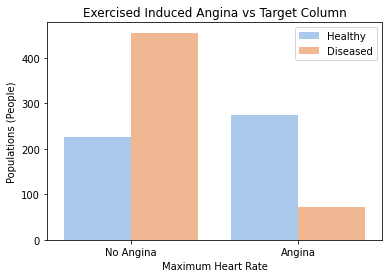

In [50]:
countplot = sns.countplot(
  data = heartData,
  x = 'exang',
  hue = 'target',
  palette = pastel
)

countplot.set_xticklabels(["No Angina", "Angina"])
plt.title("Exercised Induced Angina vs Target Column")
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Populations (People)")
plt.legend(["Healthy", "Diseased"])

From the countplot above, we can clearly see that many **diseased people** got almost no Angina, which could indicate a big effect from this column towards the end `target` column

#### 7. Oldpeak (`oldpeak`)
- ST depression induced by exercise relative to rest

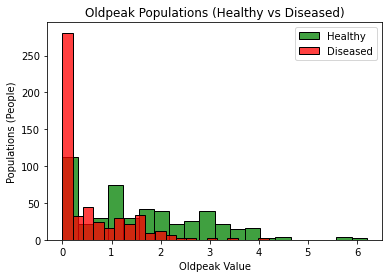

In [52]:
# `oldpeak` values for both `target column` types histplot

#Histogram for healthy oldpeak
sns.histplot(
  heartData.where(heartData['target'] == 0)['oldpeak'],
  bins = 20,
  color = 'green' 
)

plt.xlabel("Maximum Heart Rate")
plt.ylabel("Populations (People)")

#Histogram for diseased target
sns.histplot(
  heartData.where(heartData['target'] == 1)['oldpeak'],
  bins = 20,
  color = 'red'
)

plt.xlabel("Oldpeak Value")
plt.ylabel("Populations (People)")
plt.legend(["Healthy", "Diseased"])
plt.title("Oldpeak Populations (Healthy vs Diseased)")

#Show both histplots in one graph
plt.show()

From the histplot above, we can see that **diseased people** mostly got `0` value in `oldpeak`. So far in this analysis, `oldpeak` shows us the most significantly different value from **diseased people** than the healthy ones. This data could indicate that `oldpeak` column will greatly affect `target` column, hence our prediction later on.

#### 8. Slope of Peak Exercise ST Segment (`slope`)
- From the official dataset's description, `slope` columns could have three values, which are:
  1. `0` -> upsloping,
  2. `1` -> flat,
  3. `2` -> downsloping
- Again, we will compare between this column against the `target column`

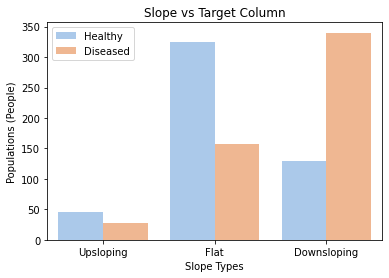

In [55]:
countplot = sns.countplot(
  data = heartData,
  x = 'slope',
  hue = 'target',
  palette = pastel
)

countplot.set_xticklabels(["Upsloping", "Flat", "Downsloping"])
plt.title("Slope vs Target Column")
plt.xlabel("Slope Types")
plt.ylabel("Populations (People)")
plt.legend(["Healthy", "Diseased"])

From the plot above, we can see that **healthy people** tends to have flat `slope` type, which is assumed to be normal. However, the 'slope' third type (Downsloping) is found on many **diseased people**, which indicates a good chance of this column affecting `target column`

#### 9. Major Vessels Count by Flourosopy
- `ca` column (Major Vessels) can have three value (0 - 3)
- Lastly, we will compare between this column against the `target column`

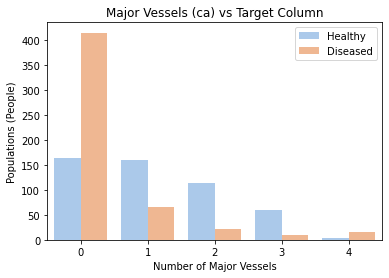

In [57]:
countplot = sns.countplot(
  data = heartData,
  x = 'ca',
  hue = 'target',
  palette = pastel
)

plt.title("Major Vessels (ca) vs Target Column")
plt.xlabel("Number of Major Vessels")
plt.ylabel("Populations (People)")
plt.legend(["Healthy", "Diseased"])

The plot above also shows a significant different between **healthy** and **diseased people**. Where the **diseased** tends to be found with zero number of major vessels. So, we will consider this column important for the prediction.

#### 10. Other Columns
- The original dataset features several other columns, which *after* the calculation in the **correlation tasks** (next step), turns out to be quite redundant and can be grouped together.


 ##### Resting Blood Pressure (`trestbps`)
`trestbps` is calculated in mm/Hg, which normally valued as **120 mm/Hg** in adult
- The test result for thallasemia can be divided into values:
  1. `0` -> normal
  2. `1` -> fixed defect
  3. `2` -> reversable defect
- The code below indicates that **diseased people** tends to have `thal` type 2

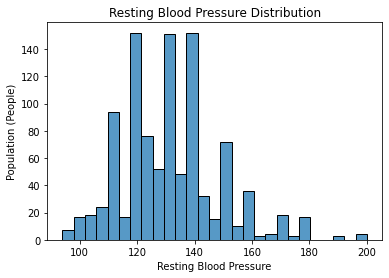

In [15]:
sns.histplot(
  heartData.trestbps,
  palette = pastel
)

plt.xlabel("Resting Blood Pressure")
plt.ylabel("Population (People)")
plt.title("Resting Blood Pressure Distribution")
plt.show()

From the histplot above, it can be concluded that the blood pressure of most people in the table is between **120 mmHg - 140 mmHg**

##### Serum Cholestrol (`chol`)
- In mg/dL, healthy `chol` is less than 200 mg/dL.
- In the stepped chart below, it's clear that most people from the table got unhealthy `chol` in around 200 - 300 mg/dL, even some reach 400 mg/dL 
- But, high `chol` (unhealthy) can be found in **healthy people** *(pointed by some blue bars in the right side)* which means it's not highly affecting the `target` column

Text(0, 0.5, 'Population (People)')

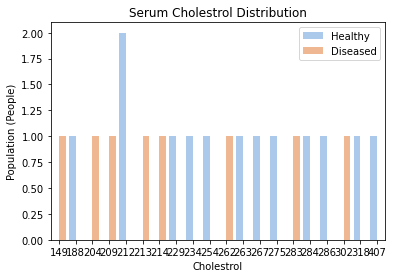

In [ ]:
countplot = sns.countplot(
  data = heartData[0:len(heartData):50],
  x = 'chol',
  hue = 'target',
  palette = pastel
)

plt.title("Serum Cholestrol Distribution")
plt.legend(["Healthy", "Diseased"])
plt.xlabel("Cholestrol")
plt.ylabel("Population (People)")

##### Fasting Blood Sugar (`fbs`)
- In the table, if `fbs` less than 120 mg/dL, it will be valued as `1`, otherwise it would be `0`
- From the plot below, it can be seen that both **healthy** and **diseased** people got relatively same `fbs`, so it doesn't seem to affecting the `target` column very much

Text(0, 0.5, 'Population (People)')

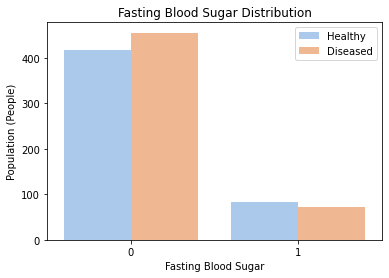

In [ ]:
countplot = sns.countplot(
  data = heartData,
  x = 'fbs',
  hue = 'target',
  palette = pastel
)

plt.title("Fasting Blood Sugar Distribution")
plt.legend(["Healthy", "Diseased"])
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Population (People)")

##### Thallasemia (`tha`)
- The plot below shows that **diseased people** tends to have `thal` type 2

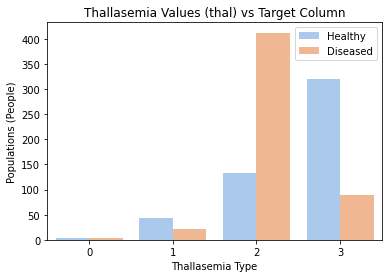

In [58]:
countplot = sns.countplot(
  data = heartData,
  x = 'thal',
  hue = 'target',
  palette = pastel
)

plt.title("Thallasemia Values (thal) vs Target Column")
plt.xlabel("Thallasemia Type")
plt.ylabel("Populations (People)")
plt.legend(["Healthy", "Diseased"])

### **Step 3: Data Preprocessing**
After manually analyzing *almost* all columns from the original dataset, we are now prepared to preprocess the data. Our goal in this step is simply to transform our DataFrame into a more readable format for the ML Model that we're going to built later on.

Flow: TODOS:

#### 1. Downsampling Process and Outliers Removal

In this notebook, the writer **did not** perform downsampling process and outliers removal. \
These steps are considered to be unnecessary since the dataset is **quite small (1205 rows and 14 columns)** and **got no extreme variations** (that could lead to outliers removal). \
The dataset information details can be observed with the code block below:

In [60]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 2. Null Values Check

#### 3. Duplicate Values Check

#### 4. Correlation Task
At last, after manually analyze *almost* each column's effect towards `target` column, we will use `.corr()` method to calculate the exact correlation between each column toward the `target` column

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


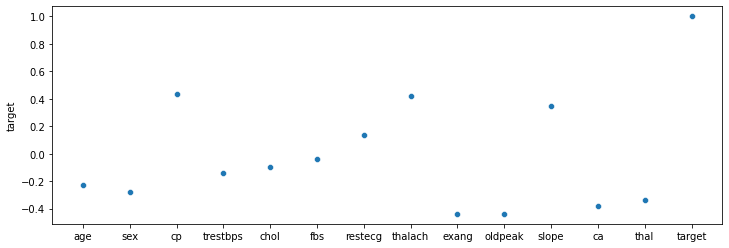

In [63]:
# Print and sort all column's correlation toward 'target' column
print(heartData.corr()['target'].sort_values(ascending=False))

# Visualize corr() on `target` column using scatterplot
plt.figure(figsize=(12, 4))
sns.scatterplot(data = heartData.corr()['target'])
plt.show()

In the simple Series above, we can conclude and obviously rank the correlation of each columns.
- These data are critically useful for our prediction and ML Model training later on, simply because their value towards `target` are reversed.
- **Negative correlation** means it will increase the chance of a patient got heart disease (towards `1` **(diseased))**.\
    By this definition, we can conclude that `age`, `sex`, `trestbps`, `chol`, `exang`, `oldpeak`, `ca` and `thal` can be a affecting factors on increasing the odd of **heart diseased patient**
- **Positive correlation** will decrease the chance of a patient got heart disease (towards `0` **(healthy)**)
    On the other hand, we can conclude that `chest pain`, `fbs`, `restecg`, `thalach`, and `slope` can be a affecting factors on decreasing the odd of **heart diseased patient**
- Lastly, the target's correlation value is obviously 1.0 because `target` is very correlated to itself

#### 5. Feature Engineering